In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Problem defination:
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


In [60]:
data = pd.read_csv('/content/aerofit_treadmill.csv')

In [61]:
data.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


### No missing value

In [63]:
data.isna().sum()/data.shape[0]

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [64]:
# row that are duplicate
# no duplicate found
print(f"Number of duplicate data {data.duplicated().sum()}")
data[data.duplicated()]

Number of duplicate data 0


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


### Changing
1. Usage and Fitness to Category
2. Because Fitness is rating between 1-5 and Usage is count value for no of usage per week

In [65]:
data['Usage']=data['Usage'].astype('object')
data['Fitness']=data['Fitness'].astype('object')

In [66]:
data.describe()

,Age,Education,Income,Miles
count,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,53719.577778,103.194444
std,6.943498,1.617055,16506.684226,51.863605
min,18.000000,12.000000,29562.000000,21.000000
25%,24.000000,14.000000,44058.750000,66.000000
50%,26.000000,16.000000,50596.500000,94.000000
75%,33.000000,16.000000,58668.000000,114.750000
max,50.000000,21.000000,104581.000000,360.000000


# univariate analysis

#### Unique category and its distribution ratio

In [67]:
for col in data.columns:
  print("")
  print(f" Feature $ {col} $ \n unique categories: {data[col].unique()} \n number of unique categories:  {data[col].nunique()} \n value counts:  {data[col].value_counts(normalize=True)} ")
  print("")


 Feature $ Product $ 
 unique categories: ['KP281' 'KP481' 'KP781'] 
 number of unique categories:  3 
 value counts:  KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64 


 Feature $ Age $ 
 unique categories: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42] 
 number of unique categories:  32 
 value counts:  25    0.138889
23    0.100000
24    0.066667
26    0.066667
28    0.050000
35    0.044444
33    0.044444
30    0.038889
38    0.038889
21    0.038889
22    0.038889
27    0.038889
31    0.033333
34    0.033333
29    0.033333
20    0.027778
40    0.027778
32    0.022222
19    0.022222
48    0.011111
37    0.011111
45    0.011111
47    0.011111
46    0.005556
50    0.005556
18    0.005556
44    0.005556
43    0.005556
41    0.005556
39    0.005556
36    0.005556
42    0.005556
Name: Age, dtype: float64 


 Feature $ Gender $ 
 unique categories: ['Male' 'Female'] 
 number of unique categories:  2 
 

numeric feature name: Index(['Age', 'Education', 'Income', 'Miles'], dtype='object')


[]

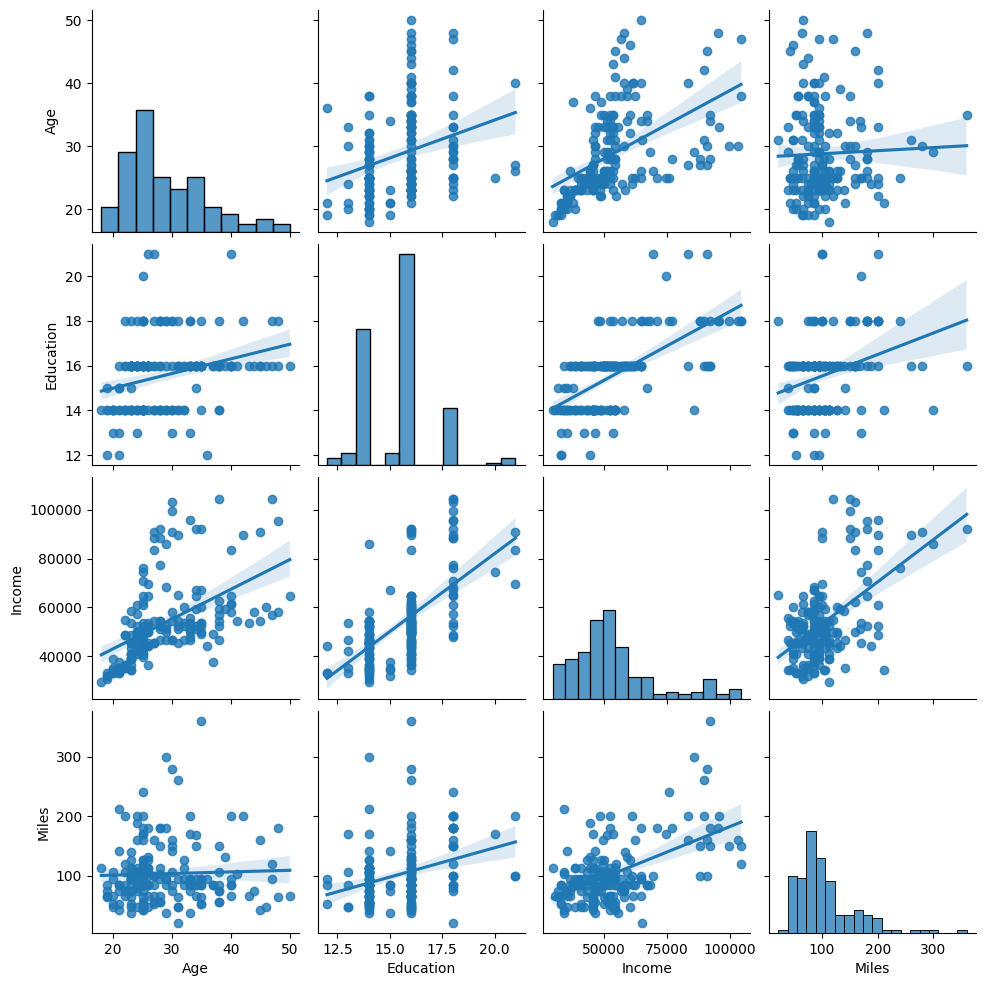

In [68]:
numeric_feature =data.select_dtypes(include =np.number)
print(f"numeric feature name: {numeric_feature.columns}")
sns.pairplot(numeric_feature , kind ='reg')
plt.plot()

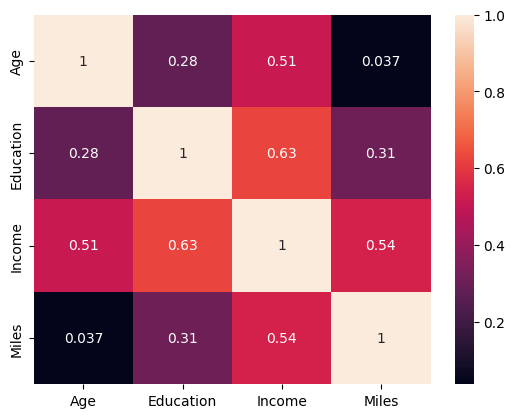

In [69]:
sns.heatmap(numeric_feature.corr(), annot=True)
plt.show()

1. 'Age' and positive correlation with Income as age increases Income  increases.
2. 'Age' and very slightly positive correlation with Miles Mature customer tend to commit for higher number of miles per week
3. 'Age' and  positive correlation with Education mature customer have passed exam more recently
4. 'Education' is very positevly  correlated with Income -- more educated people tend to earn more
5. 'Education' is  positevly  correlated with Miles -- more educated people tend commit more miles per week


1. We can target KP781  older customer as they tend earn more so they can spend more
2. For younger customer we can target KP281 or KP481 as they tend to earn less.
3. We can target KP781  to customer who have higher Education year
4. We can target KP781  customer that have higher income as they tend earn more so they can spend more and KP281 or KP481 to those who earn less

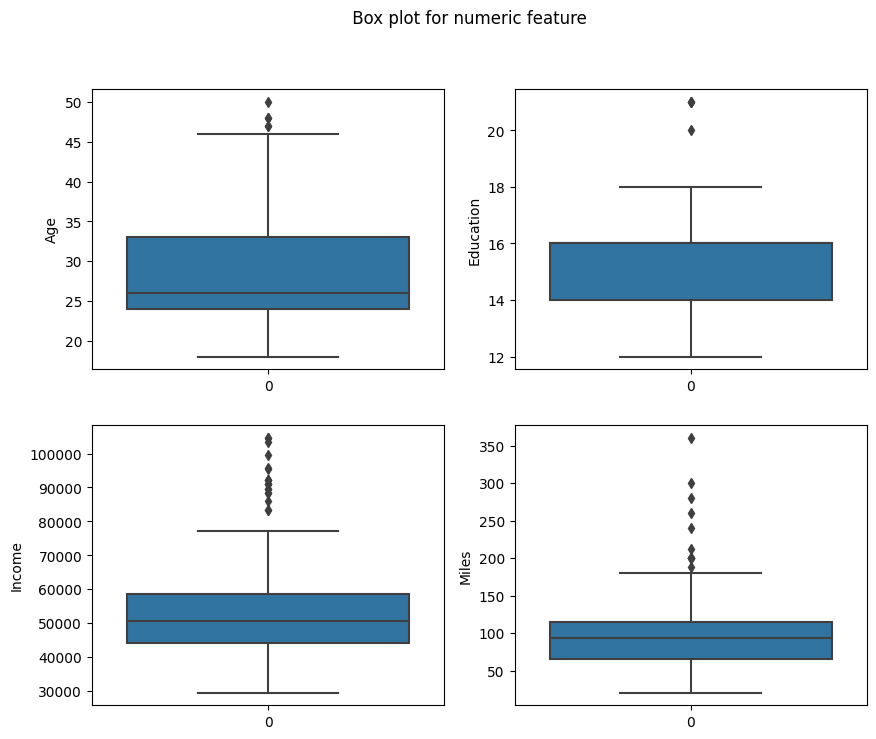

In [70]:
fig , ax = plt.subplots( 2,2 , figsize = (10,8))
for i,axis   in enumerate(ax.ravel()):
  name =numeric_feature.iloc[:,i].name
  sns.boxplot(numeric_feature[name]  , ax = axis)
  axis.set_ylabel(name)
plt.suptitle(" Box plot for numeric feature")
plt.show()

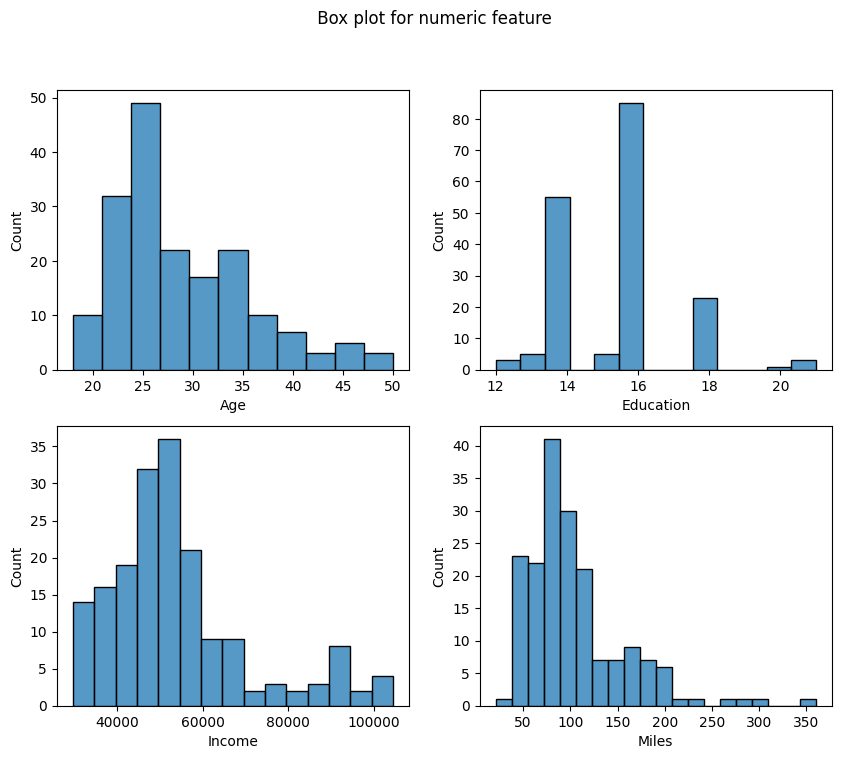

In [71]:
fig , ax = plt.subplots( 2,2 , figsize = (10,8))
for i,axis   in enumerate(ax.ravel()):
  name =numeric_feature.iloc[:,i].name
  sns.histplot(numeric_feature[name]  , ax = axis)
  axis.set_xlabel(name)
plt.suptitle(" Box plot for numeric feature")
plt.show()

In [72]:
print("Basic descriptive stats of numerical fetaures")
for col in numeric_feature.columns:
  print(f" $ {col} $:\n mean {round(numeric_feature[col].mean(),2)}\n median: {round(numeric_feature[col].median(),2)}\n std: {round(numeric_feature[col].std(),2)} \n range: {numeric_feature[col].min() ,numeric_feature[col].max()}")

Basic descriptive stats of numerical fetaures
 $ Age $:
 mean 28.79
 median: 26.0
 std: 6.94 
 range: (18, 50)
 $ Education $:
 mean 15.57
 median: 16.0
 std: 1.62 
 range: (12, 21)
 $ Income $:
 mean 53719.58
 median: 50596.5
 std: 16506.68 
 range: (29562, 104581)
 $ Miles $:
 mean 103.19
 median: 94.0
 std: 51.86 
 range: (21, 360)


1. Age has outlier outlier very few people above 45 tend to buy product , bulk of the sales is between 22 -32 years of age
2. Most people have (Education) passed in year 2016 about  (47%) , very few people have passed from 2020 onwards and those are taken as outliers
3. Most people who buy product has income between 40k to 60k , income above 80k is treated as outliers
4. Most people say they can will do 60 - 120 miles per week, Miles above 200  is  treated as outliers, some people are very optimistic  and some people are very pesimistic on number of miles they can do in a week, range varies from 21 miles to 360 miles   

1. People who quote high miles number can have high probality to buy product as they look highly motivated
2. Age between 22-32 look good to to target them for sales
3. Age between 40k -60k look good to to target them for sales  

Categorical features

In [73]:
categorical_features =data.select_dtypes(include ='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [75]:
categorical_features.columns

Index(['Product', 'Gender', 'MaritalStatus', 'Usage', 'Fitness'], dtype='object')

Categorical feature

Mode of catgory and its population ratio with count plot

mode of category Product -- KP281 -- 0.44%


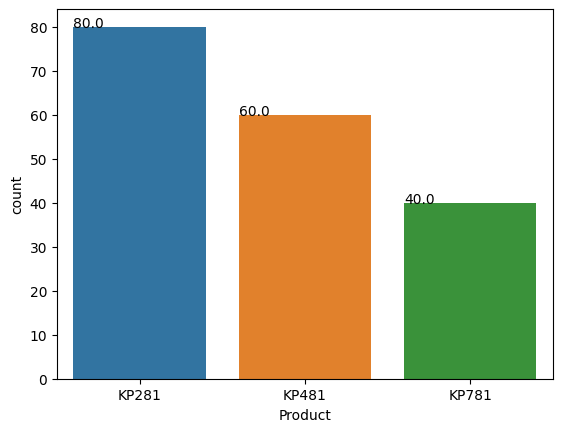

mode of category Gender -- Male -- 0.58%


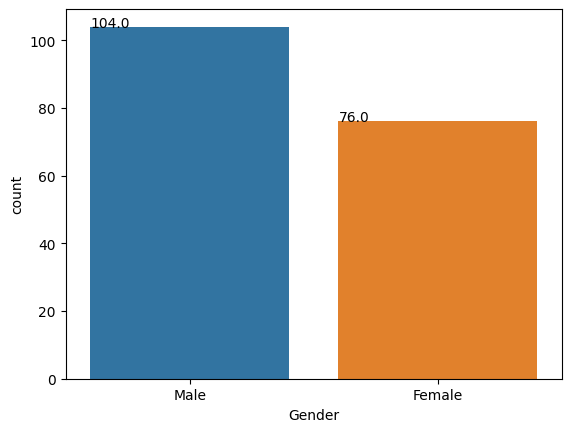

mode of category MaritalStatus -- Partnered -- 0.59%


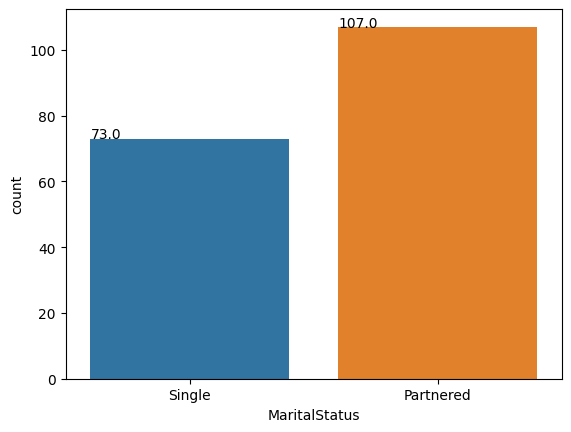

mode of category Usage -- 3 -- 0.38%


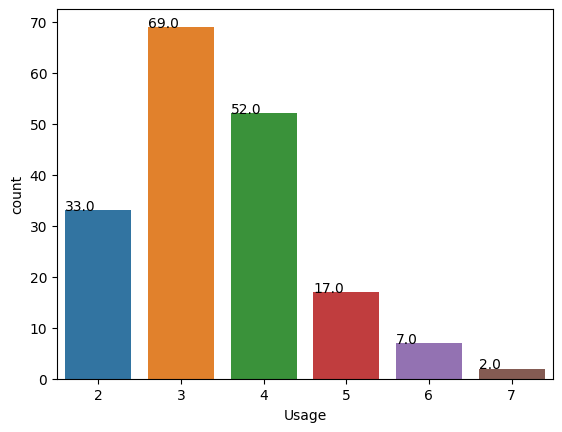

mode of category Fitness -- 3 -- 0.54%


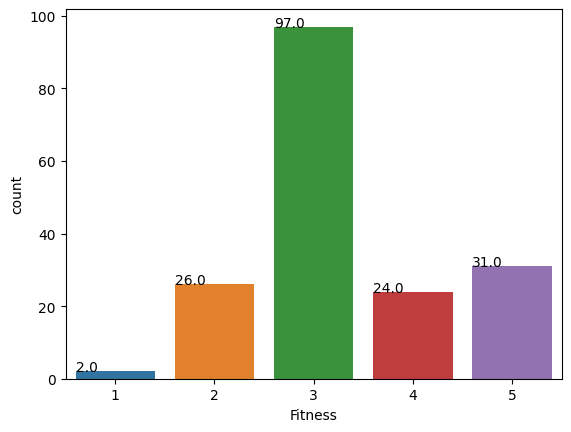

In [76]:
# count plot
for col  in categorical_features.columns:
  vc =categorical_features[col].value_counts(normalize =np.True_)
  mode , value =vc[vc==vc.max()].index[0]  , round(vc[vc==vc.max()].values[0],2)
  print(f"mode of category {col} -- {mode} -- {value}%")
  ax =sns.countplot(x= categorical_features[col])
  for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))
  plt.show()


1. Most sold 'Product' is kp281 followed by kp481 and kp781  -- people tend to by cheaper product more
2. Most numerous 'Gender' is male about 59 % and female with 41 %
3. More patnered people tend to buy product  about 59 %
4. Most people say they will use product 3 times a week  about 38 %
5. Most people say there fitness is 3 on scale of 1-5

1. Male tend to buy product more than women but the differnce in only 18 % so we can target male and may be put some offer for female
2. Its comparatively easiler to sale product to patnered people
3. Its easier to sale  product to people with fitness above 1

# Bi and multivariate analysis

Binning numerical features

In [77]:
category ='Age_bin'
def age_bin(x):
  if x< 26:
    return 'low_age'
  elif x>= 26 and x <36:
    return 'med_age'
  elif x>= 36:
    return "high_age"
data[category]=data['Age'].apply(lambda x : age_bin(x) )

category ='Income_bin'
def age_bin(x):
  if x< 45480:
    return 'low_income'
  elif x>= 45480 and x <54576:
    return 'med_income'
  elif x>= 54576:
    return "high_income"
data[category]=data['Income'].apply(lambda x : age_bin(x) )

category ='Income_bin'
def age_bin(x):
  if x< 45480:
    return 'low_income'
  elif x>= 45480 and x <54576:
    return 'med_income'
  elif x>= 54576:
    return "high_income"
data[category]=data['Income'].apply(lambda x : age_bin(x) )

category ='Miles_bin'
def age_bin(x):
  if x< 80.35:
    return 'low_miles'
  elif x>= 80.35 and x <106.00:
    return 'med_miles'
  elif x>= 106.00:
    return "high_miles"
data[category]=data['Miles'].apply(lambda x : age_bin(x) )



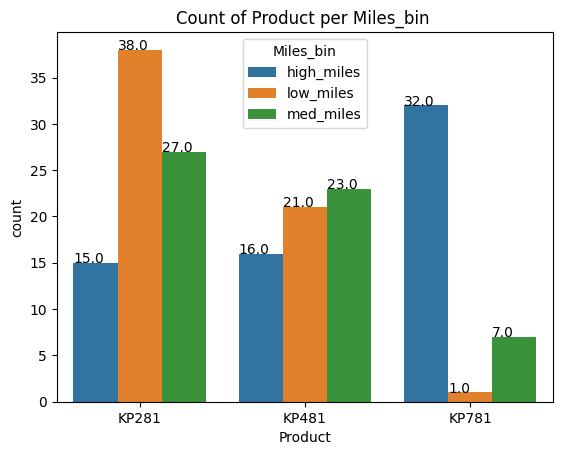

In [78]:
ax=sns.countplot(data = data , x = 'Product' , hue ='Miles_bin')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per Miles_bin ")
plt.show()

- kp281- low Miles bin people
- kp481 -- medium Miles bin people
- kp781 -- high Miles bin people
- As commited miles increse people tend to buy costly product

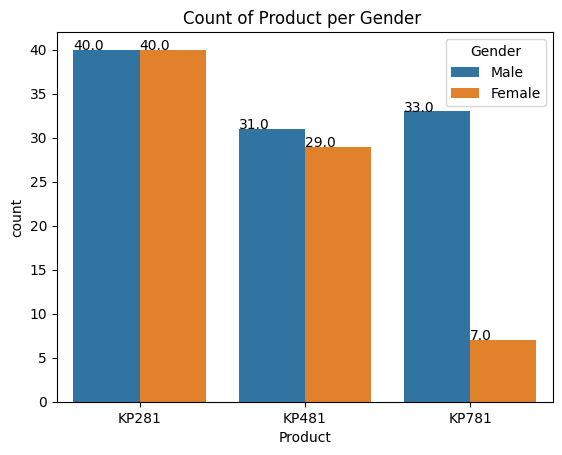

In [79]:
ax=sns.countplot(data = data , x = 'Product' , hue ='Gender')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per Gender ")
plt.show()

- kp281- both male and female buy same amount
- kp481 -- Male buy more
- kp781 -- Male buy more
- Costly product is mostly bought by male

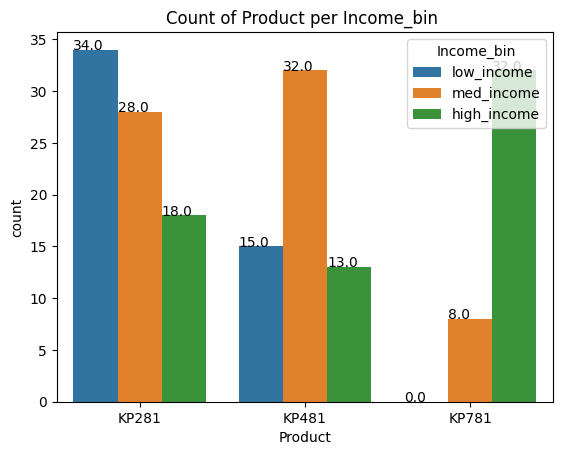

In [80]:
ax=sns.countplot(data = data , x = 'Product' , hue ='Income_bin')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per Income_bin ")
plt.show()

- kp281 -- Is bought more by low income people
- kp481 -- Is bought more by low income people
- kp781 -- Is bought more by low and medium income people

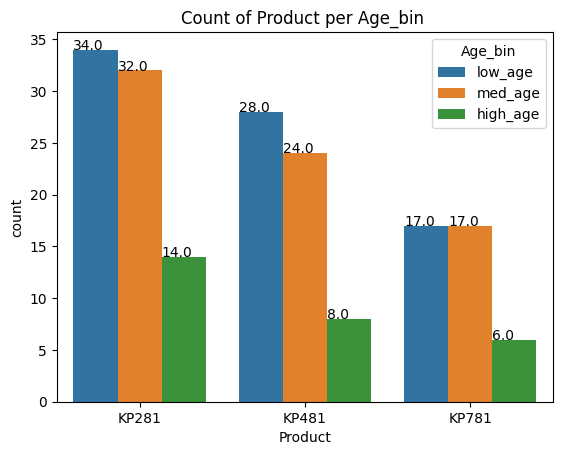

In [81]:
ax=sns.countplot(data = data , x = 'Product' , hue ='Age_bin')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per Age_bin ")
plt.show()

- kp281 -- Is bought more by low income people
- kp481 -- Is bought more by low income people
- kp781 -- Is bought more by low and medium income people

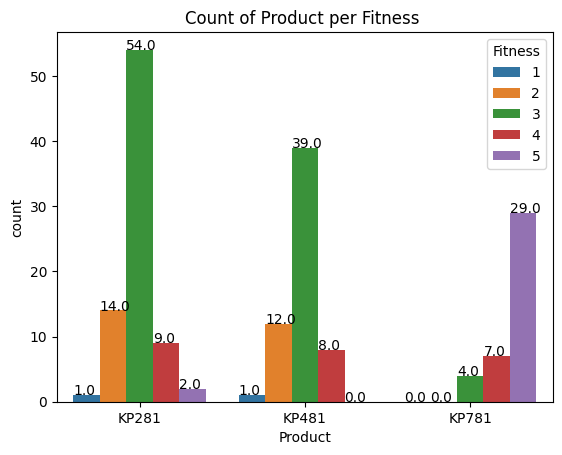

In [82]:
ax=sns.countplot(data = data , x = 'Product' , hue ='Fitness')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per Fitness ")
plt.show()

- Kp281 and kp481 is mostly bought by people by with fitness level 3
- Kp781 is mostly bought by people by with fitness level 5
- Higher fitness level people buy costly product

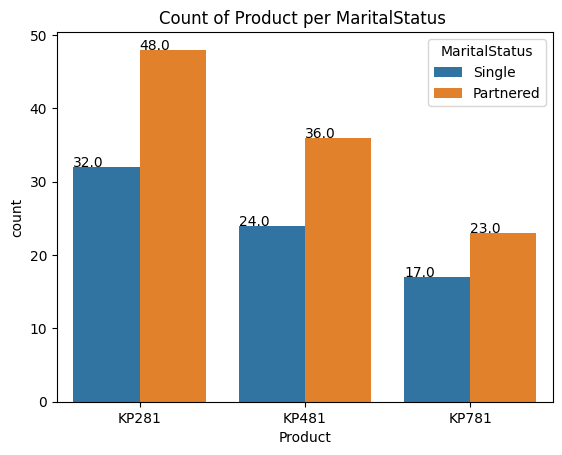

In [83]:
ax=sns.countplot(data = data , x = 'Product' , hue ='MaritalStatus')
for p in ax.patches:
      ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.title("Count of Product per MaritalStatus ")
plt.show()

- More partner people buy kp281
- More partner people buy kp481
- More partner people buy kp781
On an avg Patnered people buy product more easily


In [84]:
def write_conclusion(row ,category ='Education'  ):

  data_subset =row[1]
  keys =['KP281', 'KP481', 'KP781']
  values =data_subset[['KP281', 'KP481', 'KP781']]
  i_max =np.argmax(values)
  key=keys[i_max]
  value =values[np.argmax(values)]
  print(f"Highest probality to buy product type `{key}` with p(product = {key}/{category}= {row[1][category]}) = {round(value*100,1)} % ")

In [85]:
category ='Gender'
tab=pd.crosstab(data['Gender'], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308


Highest probality to buy product type `KP281` with p(product = KP281/Gender= Female) = 52.6 % 
Highest probality to buy product type `KP281` with p(product = KP281/Gender= Male) = 38.5 % 


In [86]:
category ='Education'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)


Product,KP281,KP481,KP781
Education,,,
12,0.666667,0.333333,0.000000
13,0.600000,0.400000,0.000000
14,0.545455,0.418182,0.036364
15,0.800000,0.200000,0.000000
16,0.458824,0.364706,0.176471
18,0.086957,0.086957,0.826087
20,0.000000,0.000000,1.000000
21,0.000000,0.000000,1.000000


Highest probality to buy product type `KP281` with p(product = KP281/Education= 12.0) = 66.7 % 
Highest probality to buy product type `KP281` with p(product = KP281/Education= 13.0) = 60.0 % 
Highest probality to buy product type `KP281` with p(product = KP281/Education= 14.0) = 54.5 % 
Highest probality to buy product type `KP281` with p(product = KP281/Education= 15.0) = 80.0 % 
Highest probality to buy product type `KP281` with p(product = KP281/Education= 16.0) = 45.9 % 
Highest probality to buy product type `KP781` with p(product = KP781/Education= 18.0) = 82.6 % 
Highest probality to buy product type `KP781` with p(product = KP781/Education= 20.0) = 100.0 % 
Highest probality to buy product type `KP781` with p(product = KP781/Education= 21.0) = 100.0 % 


In [87]:
category ='MaritalStatus'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


Highest probality to buy product type `KP281` with p(product = KP281/MaritalStatus= Partnered) = 44.9 % 
Highest probality to buy product type `KP281` with p(product = KP281/MaritalStatus= Single) = 43.8 % 


In [88]:
category ='Usage'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000


Highest probality to buy product type `KP281` with p(product = KP281/Usage= 2.0) = 57.6 % 
Highest probality to buy product type `KP281` with p(product = KP281/Usage= 3.0) = 53.6 % 
Highest probality to buy product type `KP281` with p(product = KP281/Usage= 4.0) = 42.3 % 
Highest probality to buy product type `KP781` with p(product = KP781/Usage= 5.0) = 70.6 % 
Highest probality to buy product type `KP781` with p(product = KP781/Usage= 6.0) = 100.0 % 
Highest probality to buy product type `KP781` with p(product = KP781/Usage= 7.0) = 100.0 % 


In [89]:
category ='Fitness'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484


Highest probality to buy product type `KP281` with p(product = KP281/Fitness= 1.0) = 50.0 % 
Highest probality to buy product type `KP281` with p(product = KP281/Fitness= 2.0) = 53.8 % 
Highest probality to buy product type `KP281` with p(product = KP281/Fitness= 3.0) = 55.7 % 
Highest probality to buy product type `KP281` with p(product = KP281/Fitness= 4.0) = 37.5 % 
Highest probality to buy product type `KP781` with p(product = KP781/Fitness= 5.0) = 93.5 % 


In [90]:
category ='Age_bin'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Age_bin,,,
high_age,0.500000,0.285714,0.214286
low_age,0.430380,0.354430,0.215190
med_age,0.438356,0.328767,0.232877


Highest probality to buy product type `KP281` with p(product = KP281/Age_bin= high_age) = 50.0 % 
Highest probality to buy product type `KP281` with p(product = KP281/Age_bin= low_age) = 43.0 % 
Highest probality to buy product type `KP281` with p(product = KP281/Age_bin= med_age) = 43.8 % 


In [91]:
category ='Income_bin'
tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Income_bin,,,
high_income,0.285714,0.206349,0.507937
low_income,0.693878,0.306122,0.000000
med_income,0.411765,0.470588,0.117647


Highest probality to buy product type `KP781` with p(product = KP781/Income_bin= high_income) = 50.8 % 
Highest probality to buy product type `KP281` with p(product = KP281/Income_bin= low_income) = 69.4 % 
Highest probality to buy product type `KP481` with p(product = KP481/Income_bin= med_income) = 47.1 % 


In [92]:
category ='Miles_bin'

tab =pd.crosstab(data[category], data['Product'],normalize='index')
display(tab)
all_tab =tab.reset_index()
for  row  in all_tab.iterrows():
  write_conclusion(row ,category)

Product,KP281,KP481,KP781
Miles_bin,,,
high_miles,0.238095,0.253968,0.507937
low_miles,0.633333,0.350000,0.016667
med_miles,0.473684,0.403509,0.122807


Highest probality to buy product type `KP781` with p(product = KP781/Miles_bin= high_miles) = 50.8 % 
Highest probality to buy product type `KP281` with p(product = KP281/Miles_bin= low_miles) = 63.3 % 
Highest probality to buy product type `KP281` with p(product = KP281/Miles_bin= med_miles) = 47.4 % 


Recommendations

1. People who commit higher than 106 miles has 50+% probality of buying kp781
2. People with income lower than 45480   has 69+% probality of buying kp281
3. People with income higher than 54576   has 50+% probality of buying kp781
4. People with  age lower than 26   has 50+% probality of buying kp281  
5. People with  high fitness level 5   has 93+% probality of buying kp781
6. People with  high usage  value 6 and 7   have 100% probality of buying kp781
7. Both Patnered and single people tend to buy kp281 with probality of 44% and 43%
8. if education year is 20 or 21  or 18 have 100% 100% and 82 % probality of buying kp781
9. if education year less than 18 probality of buying kp281 is higher
10. Both male and female has higher probality of buying kp281 with probality of 38.5%  and 52.6%

